## ES 335 Machine Learning Pre-Requisite Exam
### By Vansh Kumar
### 23110351


### Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.


Consider two matrices: one of ssize n x k [$a_{p,q}$] and other k x m [$b_{q,r}$]. To find a general element of their product, we use:- 

<br>

$$
c_{p,r} = \sum_{q=1}^{k} a_{p,q}\times b_{q,r}
$$
This calculation for a single element involves k multiplications and k-1 additions. Resulting matrix has n x m elements so total operations will be:- <br>

$n\times m \times k$ sums<br>
$n\times m \times (k-1)$ multiplications.

### Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [2]:
import random
import time
import numpy as np

rows_A,cols_A,cols_B=200, 200, 200

matrix_A=[[random.randint(0, 100) for i in range(cols_A)] for j in range(rows_A)]
matrix_B=[[random.randint(0, 100) for i in range(cols_B)] for j in range(cols_A)]

def mult_mat(A, B):
    rows_A=len(A)
    cols_A=len(A[0])
    cols_B=len(B[0])
    
    result_C=[[0]*cols_B for k in range(rows_A)]
    
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result_C[i][j]+=A[i][k]*B[k][j]
    return result_C

start_time=time.time()
result_list=mult_mat(matrix_A, matrix_B)
time_list=time.time() - start_time

array_A=np.array(matrix_A)
array_B=np.array(matrix_B)

start_time=time.time()
result_numpy=np.dot(array_A, array_B)
time_numpy=time.time()-start_time

print(f"Time taken using list of lists: {time_list:.6f} secs")
print(f"Time taken using NumPy: {time_numpy:.6f} secs")

if time_list>time_numpy:
    print("NumPy is faster.")
else:
    print("List of lists is faster.")


Time taken using list of lists: 0.681968 secs
Time taken using NumPy: 0.002953 secs
NumPy is faster.


In most of the cases numpy multiplication seems to be faster due to its optimized implementation and use of lower-level numerical libraries.

### Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against `numpy.median` routine in terms of time?

If we know the length of array, then we should first sort the array. It takes O(nlogn) time to sort. Then after sorting, median can be found using O(1) constant time. 

So the complexity by this method is O(nlogn)

To find a better method, we can use quick select algorithm to find kth smallest algorithm (in this case for median, k = n/2).

We achieved this using O(n) time which is better than O(nlogn) 

In [3]:
import random
import time
from random import randint
import numpy as np

n=10000
data=[random.randint(0, 1000) for i in range(n)]

# Method 1: Find median using sorting
def median_sorting(arr):
    sorted_arr=sorted(arr)
    length=len(sorted_arr)
    if length%2==1:
        return sorted_arr[length//2]
    else:
        mid1=length//2-1
        mid2=length//2
        return (sorted_arr[mid1]+sorted_arr[mid2])/2

# Method 2: Find median using Quickselect
def quickselect(arr, k):
    if len(arr)==1:
        return arr[0]
    
    pivot=arr[randint(0, len(arr) - 1)]
    lows=[x for x in arr if x < pivot]
    highs=[x for x in arr if x > pivot]
    pivots=[x for x in arr if x == pivot]

    if k<len(lows):
        return quickselect(lows, k)
    elif k<len(lows)+len(pivots):
        return pivots[0]
    else:
        return quickselect(highs, k-len(lows)-len(pivots))

def median_quickselect(arr):
    length=len(arr)
    if length%2==1:
        return quickselect(arr, length//2)
    else:
        mid1=length//2 - 1
        mid2=length//2
        return (quickselect(arr, mid1)+quickselect(arr, mid2))/2

# Method 3: Find median using NumPy
def median_numpy(arr):
    return np.median(arr)

# Timing the median using sorting
start_time=time.time()
median_sort=median_sorting(data)
time_sort=time.time()-start_time

# Timing the median using Quickselect
start_time=time.time()
median_quick=median_quickselect(data)
time_quick=time.time()-start_time

# Timing the median using NumPy
start_time=time.time()
median_np=median_numpy(data)
time_np=time.time()-start_time

print(f"Median using sorting: {median_sort}, Time taken: {time_sort:.6f} seconds")
print(f"Median using Quickselect: {median_quick}, Time taken: {time_quick:.6f} seconds")
print(f"Median using NumPy: {median_np}, Time taken: {time_np:.6f} seconds")



Median using sorting: 503.0, Time taken: 0.001999 seconds
Median using Quickselect: 503.0, Time taken: 0.022109 seconds
Median using NumPy: 503.0, Time taken: 0.007021 seconds


### Q4. What is the gradient of the following function with respect to x and y?
$$
f(x,y) = x^2y + y^3sin(x)
$$

Gradient of the Function

To find the gradient, we compute the partial derivatives with respect to x and y.

#### Partial Derivative with Respect to \( x \):

$$
\frac{\partial f}{\partial x} = \frac{\partial}{\partial x} \left( x^2 y + y^3 \sin x \right)
$$

- For \( x^2 y \), the derivative is \( 2x y \). 
- For \( y^3 sin x \), the derivative is \( y^3 cos x \).

Thus:

$$
\frac{\partial f}{\partial x} = 2x y + y^3 \cos x
$$

#### Partial Derivative with Respect to \( y \):

$$
\frac{\partial f}{\partial y} = \frac{\partial}{\partial y} \left( x^2 y + y^3 \sin x \right)
$$

- For \( x^2 y \), the derivative is \( x^2 \).
- For \( y^3 sin x \), the derivative is \( 3y^2 sin x \).

Thus:

$$
\frac{\partial f}{\partial y} = x^2 + 3y^2 \sin x
$$

#### Gradient

The gradient of the function \( f(x, y) \) is:

$$
\nabla f(x, y) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)
$$

So the gradient is:

$$
\nabla f(x, y) = \left( 2x y + y^3 \cos x, x^2 + 3y^2 \sin x \right)
$$


### Q5. Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

### Q6. Use sympy to confirm that you obtain the same gradient analytically.

### Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

﻿

1. 2022
1. Branch 1
1. Roll Number: 1, Name: N, Marks: 1. Maths: 100, English: 70 ...
2. Branch 2
2. 2023
1. Branch 1
2. Branch 2
3. 2024
1. Branch 1
2. Branch 2
4. 2025
1. Branch 1
2. Branch 2

In [5]:
students = {
    2022: {
        'Branch 1': {
            1: {'Name': 'Alice', 'Marks': {'Maths': 100, 'English': 70}},
            2: {'Name': 'Bob', 'Marks': {'Maths': 80, 'English': 85}}
        },
        'Branch 2': {
            1: {'Name': 'Charlie', 'Marks': {'Maths': 90, 'English': 60}},
            2: {'Name': 'David', 'Marks': {'Maths': 70, 'English': 75}}
        }
    },
    2023: {
        'Branch 1': {
            1: {'Name': 'Eve', 'Marks': {'Maths': 95, 'English': 80}},
            2: {'Name': 'Frank', 'Marks': {'Maths': 85, 'English': 90}}
        },
        'Branch 2': {
            1: {'Name': 'Grace', 'Marks': {'Maths': 75, 'English': 70}},
            2: {'Name': 'Hank', 'Marks': {'Maths': 88, 'English': 78}}
        }
    },
    2024: {
        'Branch 1': {
            1: {'Name': 'Ivy', 'Marks': {'Maths': 92, 'English': 77}},
            2: {'Name': 'Jack', 'Marks': {'Maths': 81, 'English': 69}}
        },
        'Branch 2': {
            1: {'Name': 'Kathy', 'Marks': {'Maths': 89, 'English': 83}},
            2: {'Name': 'Leo', 'Marks': {'Maths': 73, 'English': 72}}
        }
    },
    2025: {
        'Branch 1': {
            1: {'Name': 'Mia', 'Marks': {'Maths': 97, 'English': 85}},
            2: {'Name': 'Nate', 'Marks': {'Maths': 82, 'English': 80}}
        },
        'Branch 2': {
            1: {'Name': 'Olivia', 'Marks': {'Maths': 78, 'English': 74}},
            2: {'Name': 'Paul', 'Marks': {'Maths': 90, 'English': 76}}
        }
    }
}

print(students)

{2022: {'Branch 1': {1: {'Name': 'Alice', 'Marks': {'Maths': 100, 'English': 70}}, 2: {'Name': 'Bob', 'Marks': {'Maths': 80, 'English': 85}}}, 'Branch 2': {1: {'Name': 'Charlie', 'Marks': {'Maths': 90, 'English': 60}}, 2: {'Name': 'David', 'Marks': {'Maths': 70, 'English': 75}}}}, 2023: {'Branch 1': {1: {'Name': 'Eve', 'Marks': {'Maths': 95, 'English': 80}}, 2: {'Name': 'Frank', 'Marks': {'Maths': 85, 'English': 90}}}, 'Branch 2': {1: {'Name': 'Grace', 'Marks': {'Maths': 75, 'English': 70}}, 2: {'Name': 'Hank', 'Marks': {'Maths': 88, 'English': 78}}}}, 2024: {'Branch 1': {1: {'Name': 'Ivy', 'Marks': {'Maths': 92, 'English': 77}}, 2: {'Name': 'Jack', 'Marks': {'Maths': 81, 'English': 69}}}, 'Branch 2': {1: {'Name': 'Kathy', 'Marks': {'Maths': 89, 'English': 83}}, 2: {'Name': 'Leo', 'Marks': {'Maths': 73, 'English': 72}}}}, 2025: {'Branch 1': {1: {'Name': 'Mia', 'Marks': {'Maths': 97, 'English': 85}}, 2: {'Name': 'Nate', 'Marks': {'Maths': 82, 'English': 80}}}, 'Branch 2': {1: {'Name': '

### Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [4]:
class Student:
    def __init__(self, rno, name, marks):
        self.rno=rno
        self.name=name
        self.marks=marks  
    def __repr__(self):
        return f"Student(Roll Number:{self.rno}, Name:{self.name}, Marks:{self.marks})"


class Branch:
    def __init__(self, b_name):
        self.b_name=b_name
        self.students=[]  

    def add_student(self,student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch(Name:{self.b_name}, Students:{self.students})"

class Year:
    def __init__(self, year):
        self.year=year
        self.branches=[]  

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year(Year:{self.year}, Branches:{self.branches})"


class Database:
    def __init__(self):
        self.years=[]

    def add_year(self, year):
        self.years.append(year)

    def __repr__(self):
        return f"Database(Years:{self.years})"

s1=Student(1, 'Alice', {'Maths': 100, 'English': 70})
s2=Student(2, 'Bob', {'Maths': 80, 'English': 85})
s3=Student(1, 'Charlie', {'Maths': 90, 'English': 60})
s4=Student(2, 'David', {'Maths': 70, 'English': 75})

b1_2022=Branch('Branch 1')
b1_2022.add_student(s1)
b1_2022.add_student(s2)

b2_2022=Branch('Branch 2')
b2_2022.add_student(s3)
b2_2022.add_student(s4)

y_2022=Year(2022)
y_2022.add_branch(b1_2022)
y_2022.add_branch(b2_2022)

db=Database()
db.add_year(y_2022)

print(db)


Database(Years:[Year(Year:2022, Branches:[Branch(Name:Branch 1, Students:[Student(Roll Number:1, Name:Alice, Marks:{'Maths': 100, 'English': 70}), Student(Roll Number:2, Name:Bob, Marks:{'Maths': 80, 'English': 85})]), Branch(Name:Branch 2, Students:[Student(Roll Number:1, Name:Charlie, Marks:{'Maths': 90, 'English': 60}), Student(Roll Number:2, Name:David, Marks:{'Maths': 70, 'English': 75})])])])


### Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
1. $y=x$
2. $y=x^2$
3. $y = \frac{x^3}{100}$
4. $y = sin(x)$
5. $y = \frac{sin(x)}{x}$
6. $y = log(x)$
7. $y = e^x$

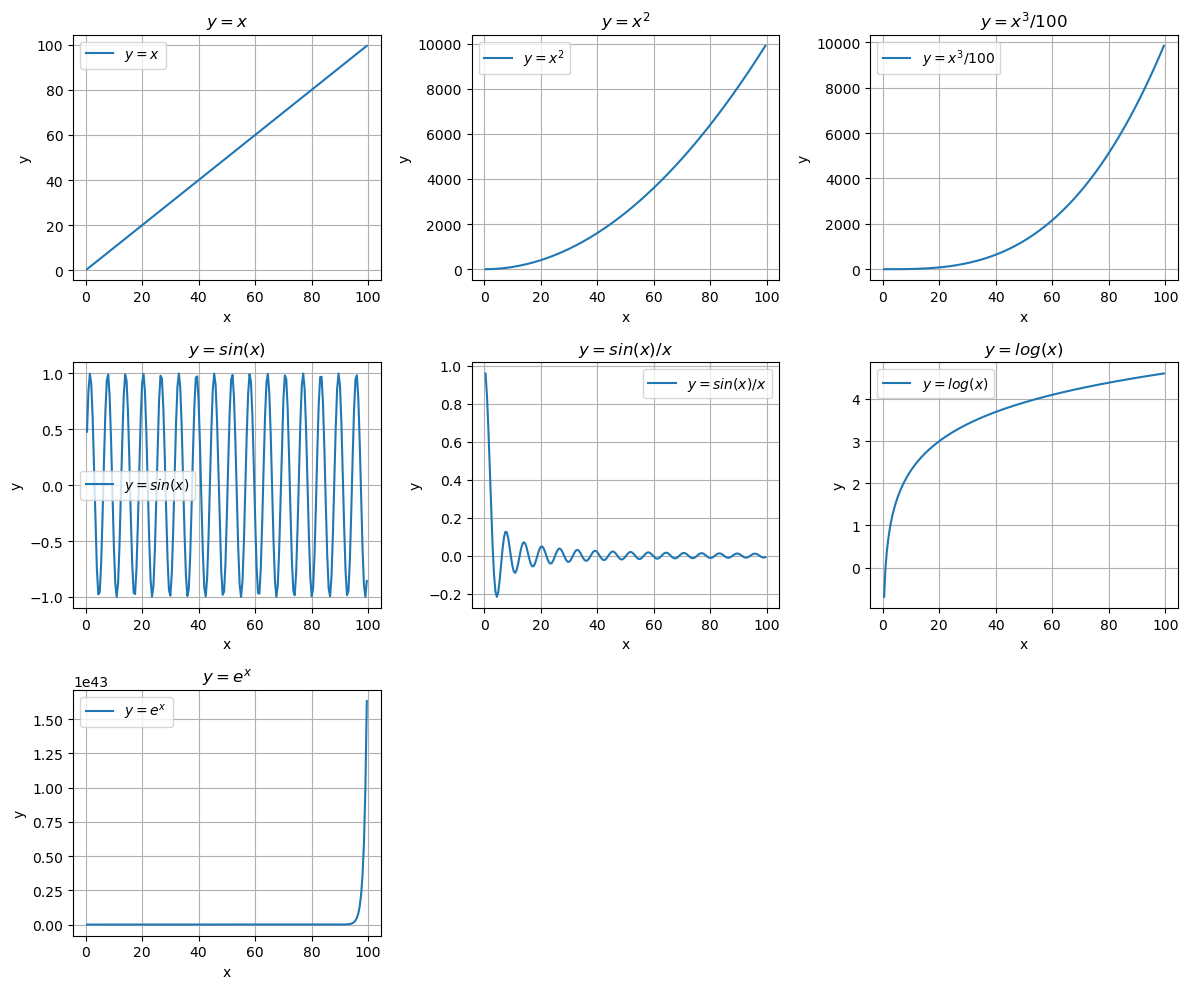

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0.5, 100.0, 0.5)

y1=x
y2=x**2
y3=(x**3) / 100
y4=np.sin(x)
y5=np.sin(x) / x
y6=np.log(x)
y7=np.exp(x)

plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1)
plt.plot(x, y1, label='$y=x$')
plt.title('$y=x$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 2)
plt.plot(x,y2,label='$y=x^2$')
plt.title('$y=x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 3)
plt.plot(x, y3, label='$y=x^3 / 100$')
plt.title('$y=x^3 / 100$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 4)
plt.plot(x, y4, label='$y=sin(x)$')
plt.title('$y=sin(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 5)
plt.plot(x, y5, label='$y=sin(x)/x$')
plt.title('$y=sin(x)/x$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 6)
plt.plot(x, y6, label='$y=log(x)$')
plt.title('$y=log(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 7)
plt.plot(x, y7, label='$y=e^x$')
plt.title('$y=e^x$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### Q10. Using numpy generate a matrix of size `20X5` containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [17]:
import numpy as np
import pandas as pd

mat=np.random.uniform(1, 2, size=(20, 5))

cols=['a', 'b', 'c', 'd', 'e']
df=pd.DataFrame(mat, columns=cols)

std_devs=df.std()
max_std_col=std_devs.idxmax()
max_std_value=std_devs.max()

row_means=df.mean(axis=1)
min_mean_row=row_means.idxmin()
min_mean_value=row_means.min()
print()
print("DataFrame:", df)
print()
print("Column with the highest standard deviation:")
print(f"Column: {max_std_col}, Standard Deviation: {max_std_value:.4f}")
print()
print("Row with the lowest mean:")
print(f"Row Index: {min_mean_row}, Mean: {min_mean_value:.4f}")



DataFrame:            a         b         c         d         e
0   1.048044  1.803207  1.322686  1.423327  1.405088
1   1.669845  1.961124  1.530304  1.124747  1.667924
2   1.615773  1.368175  1.011304  1.284709  1.588567
3   1.490820  1.111122  1.838253  1.741557  1.745500
4   1.428890  1.581678  1.098132  1.277455  1.813820
5   1.212953  1.791564  1.615896  1.697550  1.456631
6   1.947782  1.486475  1.465776  1.418206  1.186450
7   1.460436  1.018963  1.588385  1.095198  1.980823
8   1.501077  1.471925  1.420305  1.311625  1.921148
9   1.197593  1.642143  1.997976  1.837589  1.165051
10  1.783658  1.883834  1.547788  1.881415  1.524233
11  1.145192  1.100111  1.605654  1.968860  1.083801
12  1.766651  1.951862  1.328890  1.271858  1.837791
13  1.336939  1.142599  1.501319  1.264676  1.595416
14  1.810401  1.102119  1.600527  1.429574  1.879608
15  1.255016  1.956077  1.956639  1.395339  1.847747
16  1.939907  1.591803  1.747302  1.860486  1.142349
17  1.986728  1.789021  1.496597  

### Q11.    Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [19]:
import numpy as np
import pandas as pd

mat=np.random.uniform(1, 2, size=(20, 5))

cols=['a', 'b', 'c', 'd', 'e']
df=pd.DataFrame(mat, columns=cols)

df['f']=df[cols].sum(axis=1)

df['g']=np.where(df['f']<8,'LT8','GT8')

num_lt8=(df['g']=='LT8').sum()

std_lt8=df[df['g']=='LT8']['f'].std()
std_gt8=df[df['g']=='GT8']['f'].std()

print("DataFrame:", df)
print()
print("Number of rows where 'g' is 'LT8':", num_lt8)
print(f"Standard deviation of 'f' for 'LT8': {std_lt8:.4f}")
print(f"Standard deviation of 'f' for 'GT8': {std_gt8:.4f}")


DataFrame:            a         b         c         d         e         f    g
0   1.085349  1.547401  1.558419  1.239403  1.037081  6.467653  LT8
1   1.275240  1.021859  1.674798  1.415193  1.912363  7.299453  LT8
2   1.758313  1.487698  1.664830  1.663129  1.578720  8.152690  GT8
3   1.078039  1.936398  1.281256  1.758817  1.402438  7.456948  LT8
4   1.269716  1.687997  1.829200  1.234685  1.486393  7.507991  LT8
5   1.040048  1.728781  1.191195  1.222989  1.977085  7.160099  LT8
6   1.935332  1.125799  1.903157  1.207812  1.316262  7.488362  LT8
7   1.874090  1.614441  1.039387  1.459595  1.179492  7.167005  LT8
8   1.239175  1.712092  1.554210  1.961348  1.516975  7.983800  LT8
9   1.484622  1.097149  1.292806  1.122520  1.313390  6.310487  LT8
10  1.561502  1.322139  1.480724  1.261627  1.542095  7.168087  LT8
11  1.541636  1.230599  1.146348  1.071821  1.793688  6.784093  LT8
12  1.927003  1.714138  1.939973  1.466123  1.942572  8.989809  GT8
13  1.241667  1.745822  1.240005  1.7

### Q12. Write a small piece of code to explain broadcasting in numpy.

Broadcasting in NumPy allows operations to be performed on arrays of different shapes without explicitly reshaping them. It is a powerful feature that simplifies arithmetic operations and can improve performance.

In [6]:
import numpy as np

mat=np.array([[1,2,3],
              [4,5,6]])

vec=np.array([10, 20, 30])

f=mat+vec

print("Matrix:\n", mat)
print()
print("Vector:\n", vec)
print()
print("Result of broadcasting addition:\n", f)


Matrix:
 [[1 2 3]
 [4 5 6]]

Vector:
 [10 20 30]

Result of broadcasting addition:
 [[11 22 33]
 [14 25 36]]


### Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [10]:
import numpy as np

def argmin_find(arr):
    min_val=arr[0]
    min_i=0
    for i in range(1,len(arr)):
        if arr[i]<min_val:
            min_val=arr[i]
            min_i=i    
    return min_i

arr = np.array([3,1,4,1,5,9,2,6,5,3,5])
argmin_f=argmin_find(arr)
np_argmin=np.argmin(arr)

print("Array:", arr)
print("Computed argmin:", argmin_f)
print("NumPy argmin:", np_argmin)
if argmin_f == np_argmin:
    print("Results Match")
else:
    print("Results dont match")


Array: [3 1 4 1 5 9 2 6 5 3 5]
Computed argmin: 1
NumPy argmin: 1
Results Match


Vansh Kumar
23110351